In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

from pyod.models.cblof import CBLOF

In [4]:
!pip install pyod

  Created wheel for pyod: filename=pyod-0.9.7-py3-none-any.whl size=136272 sha256=0d266b7e69848d43680bf5ff272008c43f5f3f845f63c7d4105f728b0be49cfb
  Stored in directory: c:\users\amlas\appdata\local\pip\cache\wheels\7c\a1\43\7e69ab42be37151d91eee7daee202561a2fe01e2f48388b153
Successfully built pyod


In [8]:
PROJECT_PATH = "C:/Users/amlas/Documents/M1 SID/ProjetInterpromo/ProjectInterPromo/"

In [9]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [49]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(PROJECT_PATH + "data/sortie/Données_v0/Donnees_V0_NAN_supprimes.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(100000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1479
Nombre de données :  644348
Ratio :  0.22953435100287423
------------ Sur un echantillion ------------
Nombre de fraude : 247
Nombre de données :  100000
Ratio :  0.247


In [50]:
# Modele de prediction qui retourne un score
data_quanti_out = data_quanti.drop(['TOP_FRAUDE','TOP_FRAUDE_VIREMENT','TOP_FRAUDE_CARTE'], axis=1)
outliers_fraction = 0.01
clf = CBLOF(contamination = outliers_fraction)
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [51]:
clf.fit(data_quanti_out)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [63]:
score = clf.decision_function(data_quanti_out)
score
set(score)


{22672.78069370518,
 21492.011453068226,
 22795.617056216208,
 22471.62641990276,
 104220.72479112931,
 262220.0319623824,
 23450.44797797277,
 262270.3804123891,
 23107.290943789554,
 262349.5596923408,
 786640.6622685408,
 104249.37614396932,
 21404.23427753469,
 262382.57634182216,
 22804.4819322248,
 104257.53172550316,
 104257.97389729392,
 262402.3788066066,
 104257.80461177719,
 262415.9930493676,
 104260.36974227361,
 104267.54439769927,
 104268.76571196917,
 21179.852182443483,
 104273.58083068831,
 22809.47228021417,
 20204.590782583116,
 22158.34574148197,
 22158.73992290102,
 21833.477768269706,
 22159.486226427704,
 262551.04377264366,
 115863.11624731647,
 21183.016608092348,
 108128.45701850958,
 104303.15357973902,
 262642.9030383086,
 21838.88037774024,
 19234.399672326766,
 104316.50320004423,
 262703.82167461823,
 262707.0085847634,
 21819.01521944604,
 20212.160796765944,
 524879.9168737972,
 104324.50532814128,
 21841.403268580198,
 21841.629210487114,
 262744.6354

<ipython-input-9-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


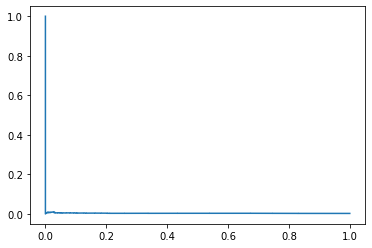

Air sous la courbe :  0.0033722394657385076


In [64]:
value, f1_score, precision, recall = evaluation(score, data_quanti["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)